<h1 style="text-align: center; color: #880808;" markdown="1">Prediction of Heart Disease</h1>
<h2 style="text-align: center; color: 5d7481" markdown="1">"Classification: Decision Trees"</h2>
<h3 style="text-align: center; color: 5d7481" markdown="1">Author: Dawit Dean </h2>

![image](heart.jpeg)

### Table of Contents
* [Dataset Information and Source](#anchor1)
* [Attribute Information](#anchor2)
* [Prepare Data for ML Algo](#anchor3)
* [Model Selection and Training](#anchor4)
* [Tune Model: Cost Complexity Pruning and Cross Validation](#anchor5)
* [Final Model](#anchor6)

## I. Dataset Information and Source <a id = anchor1 ></a>

## II. Atrribute Information <a id = anchor2 ></a>

Only 14 attributes used:
1. (age)
2. (sex)
3. (cp)
4. (trestbps)
5. (chol)
6. (fbs)
7. (restecg)
8. (thalach)
9. (exang)
10. (oldpeak)
11. (slope)
12. (ca)
13. (thal)
14. (hd) (the predicted attribute)

## III. Prepare Data for ML Algo <a id = anchor3 ></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score

In [2]:
# Import Data
df = pd.read_csv("/Users/deand/Desktop/ML Projects/Python/Projects/Classification/processed.cleveland.data", header = None)
df.columns = ['age', 'sex', 'cp', 'restbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'hd']
df.head()


,age,sex,cp,restbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


### Indentify and Handle Missing Data

In [3]:
print(df.dtypes)

age        float64
sex        float64
cp         float64
restbps    float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
hd           int64
dtype: object


Everything is float64 except for 'ca', 'thal', and 'num'. 'num' shouldn't contain any null values however 'ca' and 'thal' most likely have some impurity to them because the data types of object is used when there are a mixture of things i.e letters and numbers. We will inspect those further. 

In [4]:
# print unique values for ca
print(df['ca'].unique())

# print unique values for thal
print(df['thal'].unique())

['0.0' '3.0' '2.0' '1.0' '?']
['6.0' '3.0' '7.0' '?']


In [5]:
# print rows with missing values
mis = df.loc[(df['ca'] == '?') | (df['thal'] == '?')]
mis 

,age,sex,cp,restbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [6]:
# return percent of rows with missing values
print(str( round( len(mis) / len(df) * 100, 2) ) + "% of the rows in the dataset have atleast 1 or more missing values")

1.98% of the rows in the dataset have atleast 1 or more missing values


In [7]:
# 2% is small so we will just drop rows with missing values
dfc = df.loc[(df['ca'] != '?') & (df['thal'] != '?')]

# confirm missing values have been droped. IOW no question mark
print(dfc['ca'].unique())
print(dfc['thal'].unique())

['0.0' '3.0' '2.0' '1.0']
['6.0' '3.0' '7.0']


### Split Data Into Dependent and Independent Variables

In [8]:
## Produce copy of the columns used for Prediction
X = dfc.drop('hd', axis = 1).copy()
X.head()

,age,sex,cp,restbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [9]:
Y = dfc['hd'].copy()
Y.head()

0    0
1    2
2    1
3    0
4    0
Name: hd, dtype: int64

### Format The Data: One-Hot Encoding

The list below tells us what each variable represents and the types of data (float or double) it should contain: 

1. age: Float <br>
2. sex: Category<br>
    a. 0 = female <br>
    b. 1 = male <br>
3. cp (chest pain): Category<br>
    a. 1 = typical angina <br>
    b. 2 = atypical angina <br>
    c. 3 = non-angina pain <br>
    d. 4 = asymptomatic <br>
4. restbp (resting blood pressure): Float <br>
5. chol (serum cholesterol in mg/dl): Float <br>
6. fbs (fasting blood sugar): Category <br>
    a. 0 = (>= 120 mg/dl) <br>
    b. 1 = (< 120 mg/dl) <br>
7. restecg (resting electrocardiographic results): Category <br>
    a. 1 = normal <br>
    b. 2 = having ST-T wave abnormality <br>
    c. 3 = showing proabale or definite left venticular hypertrophy <br>
8. thalach (maximum heart rate achieved): Float <br>
9. exang (exercise induced angina): Category <br>
    a. 0 = no <br>
    b. 1 = yes <br>
10. oldpeak (ST depresssion induced by exercise relative to rest): Float <br>
11. slope (the slope of the peak exercise ST segment): Category <br>
    a. 1 = upsloping <br>
    b. 2 = flat <br>
    c. 3 = downsloping <br>
12. ca (# of major vessels (0-3) colored by fluoroscopy): Float <br>
13. thal (thalium heart rate): Category <br>
    a. 3 = normal (no cold spots) <br>
    b. 6 = fixed defect (cold spots during rest and exercise) <br>
    c. 7 = reversible defect (cold spots only appear during exercise) <br>

In [10]:
X.dtypes

age        float64
sex        float64
cp         float64
restbps    float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
dtype: object

Age, restbp, chol, and thalach all having the correct data type of float64, however the remaining variables need to inspected or modified. The scikit learn decision tree natively support continous variables however it doesn't support categorical variables. To account for this we will need to convert columns of categorical types into multiple columns of binary values. This process is known as One-Hot encoding. 

In [11]:
# get dummies for categorical variables not in binary values
X_encoded = pd.get_dummies(X, columns = ['cp', 'restecg', 'slope', 'thal']) 

X_encoded.head()

,age,sex,restbps,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,1,...,0,0,0,1,0,0,1,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,...,1,0,0,1,0,1,0,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,...,1,0,0,1,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0,0,0,1,1,0,0,1,0,0


In [12]:
# notice our independent variables are not binary 
Y.unique()

array([0, 2, 1, 3, 4])

Y is the 5 different level of heart disease. 0 = no heart disease and 1-4 are the various degrees of heart disease. We will convert our independent variable to binary values (0 = no heart disease and 1 = heart disease present). 

In [13]:
# Convert indepedent variable values to binary 
Y[ Y > 0] = 1
Y.unique()

array([0, 1])

## IIII. Model Selection and Training <a id = anchor4 ></a>

### Preliminary Tree

In [14]:
## split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_encoded, Y, random_state = 42)

## create decision tree
clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt = clf_dt.fit(X_train, Y_train)

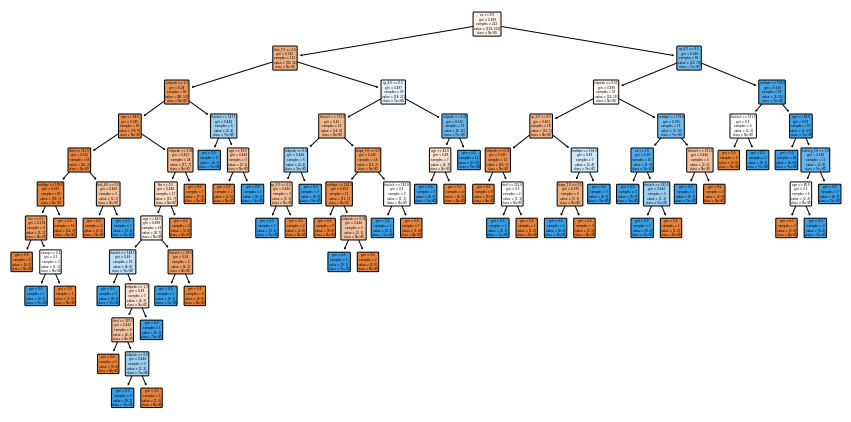

In [15]:
plt.figure(figsize=(15, 7.5))
plot_tree(clf_dt, 
          filled = True,
          rounded = True, class_names = ['No HD', 'Yes HD'], 
          feature_names=X_encoded.columns); 

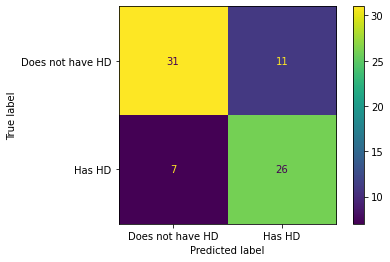

In [16]:
# run test data down tree and displays confusion matrix
predictions = clf_dt.predict(X_test)
cm = confusion_matrix(Y_test, predictions, labels=clf_dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["Does not have HD", "Has HD"])
disp.plot()
plt.show()

$$Sensitivity = TP / (TP + FN) = 26 / (26 + 7) = .79%$$
$$Specificity = TN / (TN + FP) = 31 / (31 + 11) = 0.74$$
$$Balanced Accuracy = (Sensitivity + Specificity) / 2 = 0.77$$

<h3 align="center"><font size="-1">The model is accurate for 77% of test cases. The model is probably overfitted to the training observations so further analysis is likely to increase the accuracy of our predictive classification model. </font></h1>

## IV. Tune Model: Cost Complexity Pruning and Cross Validation <a id = anchor5 ></a>

### Cost Complexity Pruning 

In [17]:
path = clf_dt.cost_complexity_pruning_path(X_train, Y_train) #determine values for alpha
ccp_alphas = path.ccp_alphas #extract the different values for alpha
ccp_alphas = ccp_alphas[:-1] #exclude max alpha value (tree with only a root)

clf_dts = [] #empty array to store the different decision trees

# create a decision tree for each alpha and each decision tree in array
for ccp_alpha in ccp_alphas: 
  clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
  clf_dt.fit(X_train, Y_train)
  clf_dts.append(clf_dt)

### Graph Accuracy vs Alpha Values

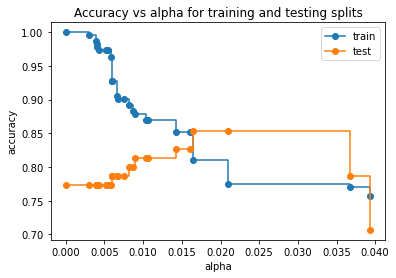

In [18]:
train_scores = [clf_dt.score(X_train, Y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test, Y_test) for clf_dt in clf_dts]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing splits")
ax.plot(ccp_alphas, train_scores, marker = 'o', label = 'train', drawstyle = 'steps-post')
ax.plot(ccp_alphas, test_scores, marker = 'o', label = 'test', drawstyle = 'steps-post')
ax.legend()
plt.show()

From the graph it appears that around 0.016 is the optimal alpha to maximize the accuracy of the model for the test dataset. We will run a 10-fold cross validation to find the optimal alpha value when accouting for different train splits. 

### 5-Fold Cross Validation

<AxesSubplot:xlabel='tree'>

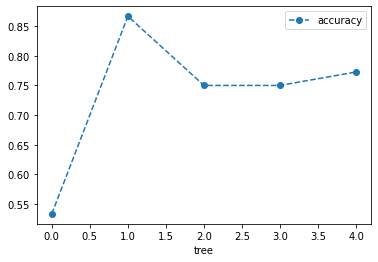

In [19]:
clf_dt = DecisionTreeClassifier(random_state = 42, ccp_alpha = 0.016)

scores = cross_val_score(clf_dt, X_train, Y_train, cv = 5)
df = pd.DataFrame(data = {'tree': range(5), 'accuracy': scores})

df.plot(x = 'tree', y = 'accuracy', marker = 'o', linestyle = '--')

Using different datsets training and testing data with the same alpha results in different accurcies. 

<AxesSubplot:xlabel='alpha'>

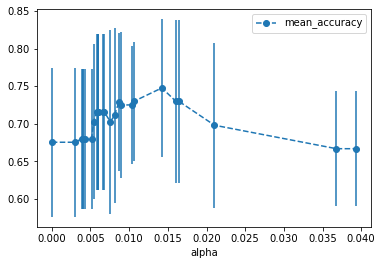

In [20]:
## stores the results of each fold during cross validation
alpha_loop_values = []

# Run 5 fold cross validation
for ccp_alpha in ccp_alphas: 
  clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
  scores = cross_val_score(clf_dt, X_train, Y_train, cv = 5)
  alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])

alpha_results = pd.DataFrame(alpha_loop_values, columns = ['alpha', 'mean_accuracy', 'std'])

alpha_results.plot(x = 'alpha', y = 'mean_accuracy', yerr='std', marker = 'o', linestyle = '--')

Using cross validation we see that overall an alpha value near 0.014 is better than our original alpha pf 0.016. The exact result is: 

In [21]:
optimal_ccp_value = alpha_results[(alpha_results['alpha'] > 0.014) & (alpha_results['alpha'] < 0.015)].alpha
optimal_ccp_value

20    0.014225
Name: alpha, dtype: float64

In [22]:
## Convert pandas series to a float
optimal_ccp_value = float(optimal_ccp_value)
optimal_ccp_value

0.014224751066856332

## V. Final Model <a id = anchor5 ></a>

In [23]:
# new decision tree w/ optimal alpha value
clf_dt_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha=optimal_ccp_value)
clf_dt_pruned = clf_dt_pruned.fit(X_train, Y_train)

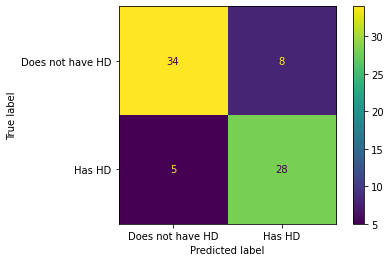

In [24]:
# confusion matrix
predictions = clf_dt_pruned.predict(X_test)
cm = confusion_matrix(Y_test, predictions, labels=clf_dt_pruned.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["Does not have HD", "Has HD"])
disp.plot()
plt.show()

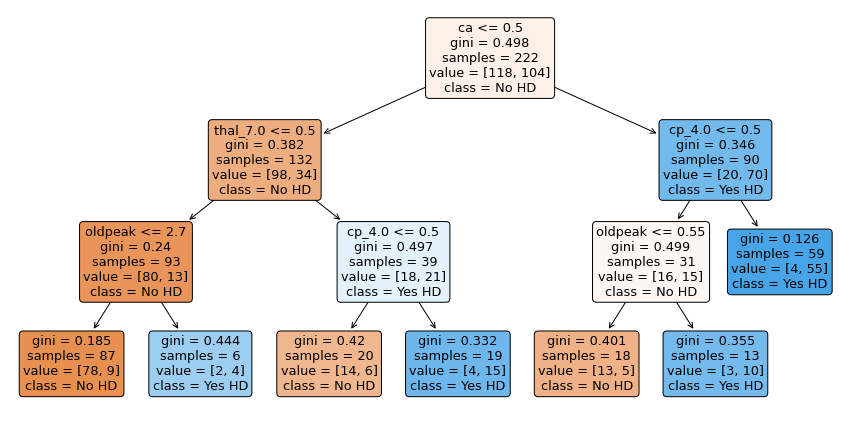

In [25]:
plt.figure(figsize=(15, 7.5))
plot_tree(clf_dt_pruned, 
          filled = True,
          rounded = True, class_names = ['No HD', 'Yes HD'], 
          feature_names=X_encoded.columns); 